# Geographic Data Science with Python - Report 2

---

## Section 1: Summary of Readings
### 1. Raster Data 
- Grid of values rendered on a map as pixels.
- Pixel values are representative of an area on the Earth's surface.
- Area is defined by the spatial resolution of the raster.
- Composed of one or more layers.

### 2. Raster Data Formats
#### Single File Types
- **.tif/.tiff**: Tagged Image Format. Very common. Used by some satellites.
- **.asc**: ASCII Raster Files. Text based format. Simple to store and distribute

#### Hierarchical Data Formats
- **.hdf/.hdf5**: Hierarchical Data Format. Very common. Used by some satellites.
- **.nc (NetCDF)**: Network Common Data Form. Common for climate data.

## Section 2: Using Raster Data with Python
### 1. Example of Opening Raster Data

In [1]:
# Import necessary packages
import os

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rioxarray as rxr

# Earthpy is an earthlab package to work with spatial data
import earthpy as et
import earthpy.plot as ep

# Get data and set working directory
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))


In [2]:
# Path to the lidar DEM raster
lidar_dem_path = os.path.join(et.io.HOME, 'earth-analytics', 'data', 'colorado-flood', 'spatial', 'boulder-leehill-rd', 'pre-flood', 'lidar', 'pre_DTM.tif')

# Read the data in and call it lidar_dtm
lidar_dtm = rxr.open_rasterio(lidar_dem_path, masked=True)

# View the data
lidar_dtm

<xarray.DataArray (band: 1, y: 2000, x: 4000)> Size: 32MB
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [3]:
type(lidar_dtm)

xarray.core.dataarray.DataArray

In [4]:
# View the min and max values of the array
print(lidar_dtm.min(), lidar_dtm.max())

<xarray.DataArray ()> Size: 4B
array(1676.21, dtype=float32)
Coordinates:
    spatial_ref  int64 8B 0 <xarray.DataArray ()> Size: 4B
array(2087.43, dtype=float32)
Coordinates:
    spatial_ref  int64 8B 0


In [5]:
# View the dimensions of the array (rows, columns)
lidar_dtm.shape

(1, 2000, 4000)

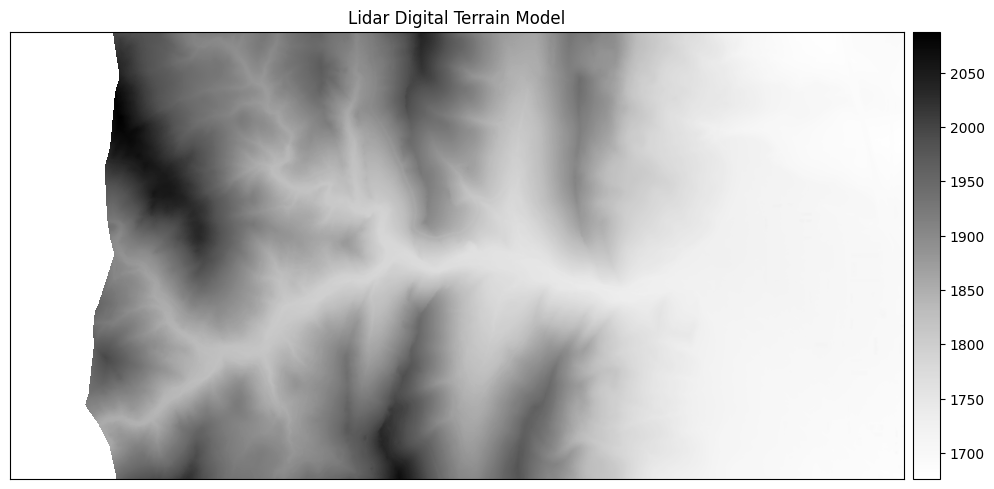

In [6]:
ep.plot_bands(lidar_dtm,
              scale=False,
              cmap='Greys',
              title="Lidar Digital Terrain Model")
plt.show()

### 3. Plot and Open a Raster Dataset

The above is lidar data from before a flood. I will use it as an example to open lidar data from after the flood occured.

In [7]:
# Path to the lidar DEM raster
lidar_dem_path_post_flood = os.path.join(et.io.HOME, 'earth-analytics', 'data', 'colorado-flood', 'spatial', 'boulder-leehill-rd', 'post-flood', 'lidar', 'post_DTM.tif')

# Read the data in and call it lidar_dtm
lidar_dtm_post_flood = rxr.open_rasterio(lidar_dem_path_post_flood, masked=True)

# View the data
lidar_dtm_post_flood

<xarray.DataArray (band: 1, y: 2000, x: 4000)> Size: 32MB
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [8]:
# View the min and max values of the array
print(lidar_dtm_post_flood.min(), lidar_dtm_post_flood.max())

<xarray.DataArray ()> Size: 4B
array(1675.71, dtype=float32)
Coordinates:
    spatial_ref  int64 8B 0 <xarray.DataArray ()> Size: 4B
array(2111.96, dtype=float32)
Coordinates:
    spatial_ref  int64 8B 0


In [9]:
# View the dimensions of the array (rows, columns)
lidar_dtm_post_flood.shape

(1, 2000, 4000)

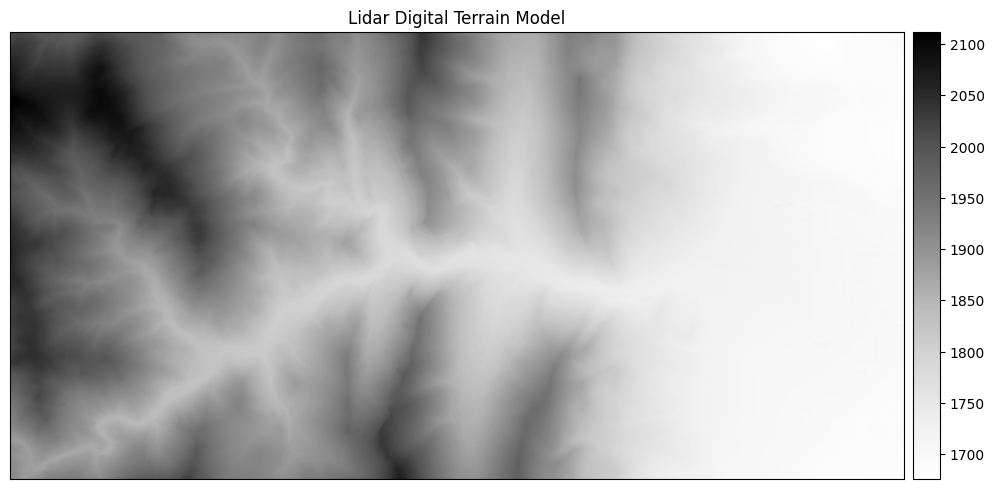

In [10]:
ep.plot_bands(lidar_dtm_post_flood,
              scale=False,
              cmap='Greys',
              title="Lidar Digital Terrain Model")
plt.show()

### 3. Imagery Raster Data

In [11]:
et.data.get_data(url="https://ndownloader.figshare.com/files/23070791")

'C:\\Users\\riley\\earth-analytics\\data\\earthpy-downloads\\naip-before-after'

In [12]:
naip_pre_fire_path = os.path.join("earthpy-downloads",
                                  "naip-before-after",
                                  "pre-fire",
                                  "crop",
                                  "m_3910505_nw_13_1_20150919_crop.tif")

naip_pre_fire_path

'earthpy-downloads\\naip-before-after\\pre-fire\\crop\\m_3910505_nw_13_1_20150919_crop.tif'

In [13]:
# Open the data using rioxarray
naip_pre_fire = rxr.open_rasterio(naip_pre_fire_path)

naip_pre_fire

<xarray.DataArray (band: 4, y: 2312, x: 4377)> Size: 81MB
[40478496 values with dtype=int16]
Coordinates:
  * band         (band) int64 32B 1 2 3 4
  * x            (x) float64 35kB 4.572e+05 4.572e+05 ... 4.615e+05 4.615e+05
  * y            (y) float64 18kB 4.427e+06 4.427e+06 ... 4.425e+06 4.425e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  239
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  32
    STATISTICS_STDDEV:   nan
    _FillValue:          -32768
    scale_factor:        1.0
    add_offset:          0.0

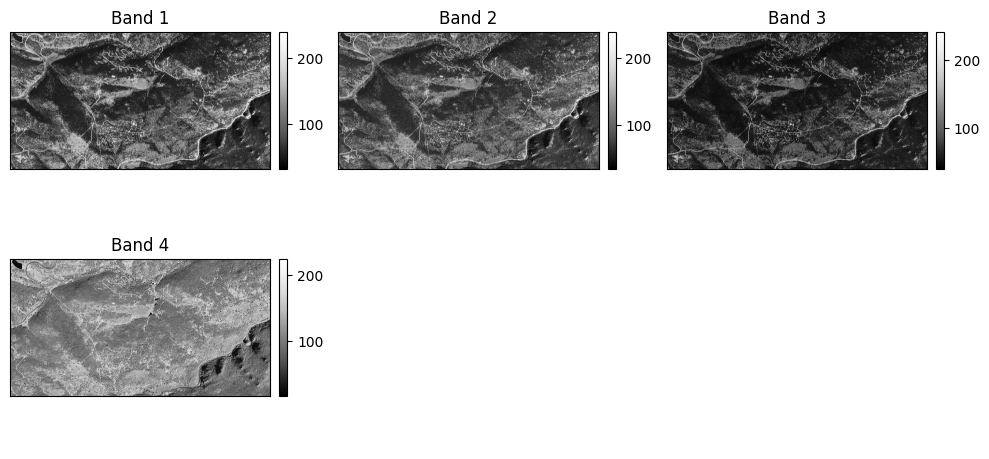

In [14]:
# Plot each layer or band of the image separately
ep.plot_bands(naip_pre_fire, figsize=(10, 5))
plt.show()

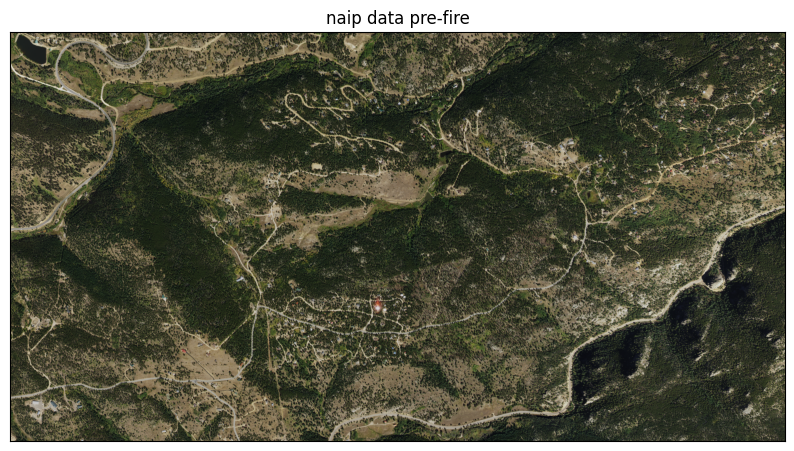

In [15]:
# Plot color image
ep.plot_rgb(naip_pre_fire.values,
            title="naip data pre-fire")
plt.show()

### 4. Plot Post Fire Data

In [16]:
naip_post_fire_path = os.path.join("earthpy-downloads",
                                   "naip-before-after",
                                   "post-fire",
                                   "crop",
                                   "m_3910505_nw_13_1_20170902_crop.tif")

naip_post_fire_path

'earthpy-downloads\\naip-before-after\\post-fire\\crop\\m_3910505_nw_13_1_20170902_crop.tif'

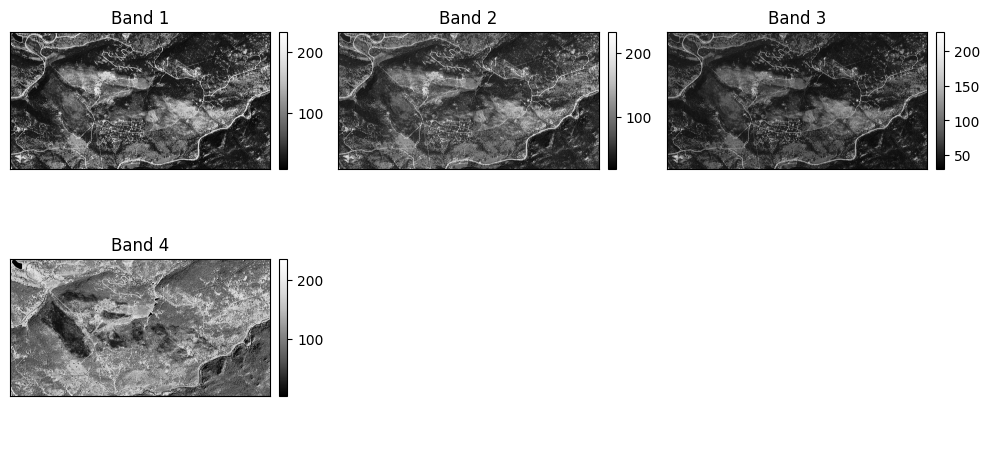

In [17]:
naip_post_fire = rxr.open_rasterio(naip_post_fire_path)
ep.plot_bands(naip_post_fire, figsize=(10, 5))
plt.show()

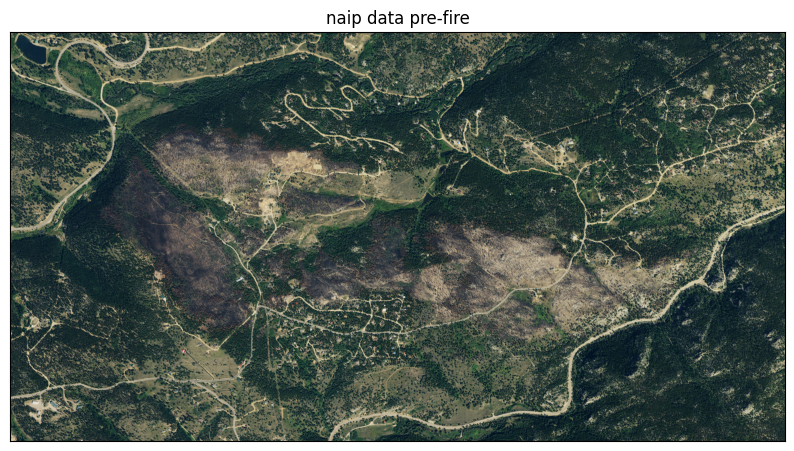

In [18]:
ep.plot_rgb(naip_post_fire.values,
            title="naip data pre-fire")
plt.show()

## Section 3. Assignment: Load DEM Raster, Derive Slope and Aspect Maps, Load Vector Layer, Overlay Vector Layer On Top of Slope and Aspect Maps

In [19]:
import os
import gzip
import shutil
import numpy as np
import rasterio
from rasterio.merge import merge
from rasterio.transform import from_origin, array_bounds
import requests
from tqdm import tqdm
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### 1. Get DEM data

In [20]:
# Folder setup
os.makedirs("srtm_tiles", exist_ok=True)
os.makedirs("tifs", exist_ok=True)

# Montana extents (approximate)
lat_range = range(45, 50)    # N45 to N49
lon_range = range(104, 117)  # W104 to W116 (note: SRTM uses W as positive!)

# Function to convert tile
def process_tile(tile_name):
    url = f"https://s3.amazonaws.com/elevation-tiles-prod/skadi/{tile_name[:3]}/{tile_name}.hgt.gz"
    gz_path = os.path.join("srtm_tiles", f"{tile_name}.hgt.gz")
    hgt_path = os.path.join("srtm_tiles", f"{tile_name}.hgt")
    tif_path = os.path.join("tifs", f"{tile_name}.tif")

    # Skip if already processed
    if os.path.exists(tif_path):
        return tif_path

    # Download
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Failed to download {tile_name}")
        return None
    with open(gz_path, 'wb') as f:
        f.write(response.content)

    # Unzip
    with gzip.open(gz_path, 'rb') as f_in:
        with open(hgt_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

    # Read binary data
    try:
        with open(hgt_path, 'rb') as f:
            data = np.fromfile(f, np.dtype('>i2'), 1201 * 1201).reshape((1201, 1201))
    except Exception:
        print(f"Failed to read {tile_name}")
        return None

    # Determine transform from tile name
    lat = int(tile_name[1:3])
    lon = int(tile_name[4:7])
    if tile_name[0] == 'S': lat = -lat
    if tile_name[3] == 'E': lon = -lon
    transform = from_origin(lon, lat + 1, 1/3600, 1/3600)  # top-left origin

    # Write GeoTIFF
    profile = {
        'driver': 'GTiff',
        'dtype': 'int16',
        'nodata': -32768,
        'width': 1201,
        'height': 1201,
        'count': 1,
        'crs': 'EPSG:4326',
        'transform': transform
    }

    with rasterio.open(tif_path, 'w', **profile) as dst:
        dst.write(data, 1)

    return tif_path

# Process all tiles in lat/lon range
tif_paths = []
print("Downloading and converting SRTM tiles...")
for lat in tqdm(lat_range):
    for lon in lon_range:
        tile = f"N{lat:02d}W{lon:03d}"
        tif = process_tile(tile)
        if tif:
            tif_paths.append(tif)

# Merge all tiles
print("Merging all tiles into one Montana DEM...")
src_files_to_mosaic = [rasterio.open(p) for p in tif_paths]
mosaic, out_trans = merge(src_files_to_mosaic)

# Write final merged DEM
out_meta = src_files_to_mosaic[0].meta.copy()
out_meta.update({
    "driver": "GTiff",
    "height": mosaic.shape[1],
    "width": mosaic.shape[2],
    "transform": out_trans
})

output_dem = "montana_merged_dem.tif"
with rasterio.open(output_dem, "w", **out_meta) as dest:
    dest.write(mosaic)

print(f"Merged DEM saved to: {output_dem}")


100%|██████████| 5/5 [00:00<00:00, 454.46it/s]

Merging all tiles into one Montana DEM...


Merged DEM saved to: montana_merged_dem.tif


### 2. Get Trail Head Vectors

In [21]:
overpass_url = "http://overpass-api.de/api/interpreter"

query = """
[out:json][timeout:180];
(
  node["highway"="trailhead"](44.3,-116.9,49.0,-104.0);
  node["information"="trailhead"](44.3,-116.9,49.0,-104.0);
  node["tourism"="information"](44.3,-116.9,49.0,-104.0);
  node["note"~"trailhead",i](44.3,-116.9,49.0,-104.0);
  node["description"~"trailhead",i](44.3,-116.9,49.0,-104.0);
);
out body;
"""

print("Querying Overpass API with broader tags for Montana trailheads...")
response = requests.post(overpass_url, data={"data": query})

if response.status_code != 200:
    raise Exception(f"Overpass query failed: HTTP {response.status_code}")

data = response.json()
elements = data.get("elements", [])

if not elements:
    raise Exception("No trailheads or related points found in Overpass response.")

print(f"Found {len(elements)} points potentially related to trailheads.")

geometry = [Point(el["lon"], el["lat"]) for el in elements]
gdf = gpd.GeoDataFrame(elements, geometry=geometry, crs="EPSG:4326")

output_dir = "week_2_data"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "trailheads_osm_broader.shp")
gdf.to_file(output_path)

print(f"Saved points to: {output_path}")


Querying Overpass API with broader tags for Montana trailheads...
Found 1140 points potentially related to trailheads.
Saved points to: week_2_data\trailheads_osm_broader.shp


c:\Users\riley\repos\GIS-independent-study\.venv\lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value '{'addr:city': 'Glendive', 'addr:housenumber': '1301', 'addr:postcode': '59330', 'addr:state': 'MT', 'addr:street': 'Snyder Avenue', 'ele': '641', 'gnis:feature_id': '1715425', 'information': 'office', 'name': 'Makoshika State Park Visitors Center', 'source': 'USGS Geonames', 'tourism': 'information', 'website': 'https://stateparks.mt.gov/makoshika/'}' of field tags has been truncated to 254 characters.  This warning will not be emitted any more for that layer.
  ogr_write(


### 3. Compute slope and Aspect

In [22]:
# Load DEM data
with rasterio.open(output_dem) as src:
    dem_data = src.read(1)
    transform = src.transform
    crs = src.crs
    bounds = src.bounds
    nodata = src.nodata

In [23]:
# Get resolution
res_x = transform.a
res_y = -transform.e  # Y resolution is usually negative

# Compute Slope and Aspect
gy, gx = np.gradient(dem_data, res_y, res_x)
slope = np.degrees(np.arctan(np.sqrt(gx**2 + gy**2)))
aspect = np.degrees(np.arctan2(-gx, gy))
aspect = (aspect + 360) % 360  # Normalize to [0, 360)

In [24]:
# Load Trailheads
trailheads = gpd.read_file(output_path)

# Reproject to DEM CRS
trailheads = trailheads.to_crs(crs)

### 4. Plot Data

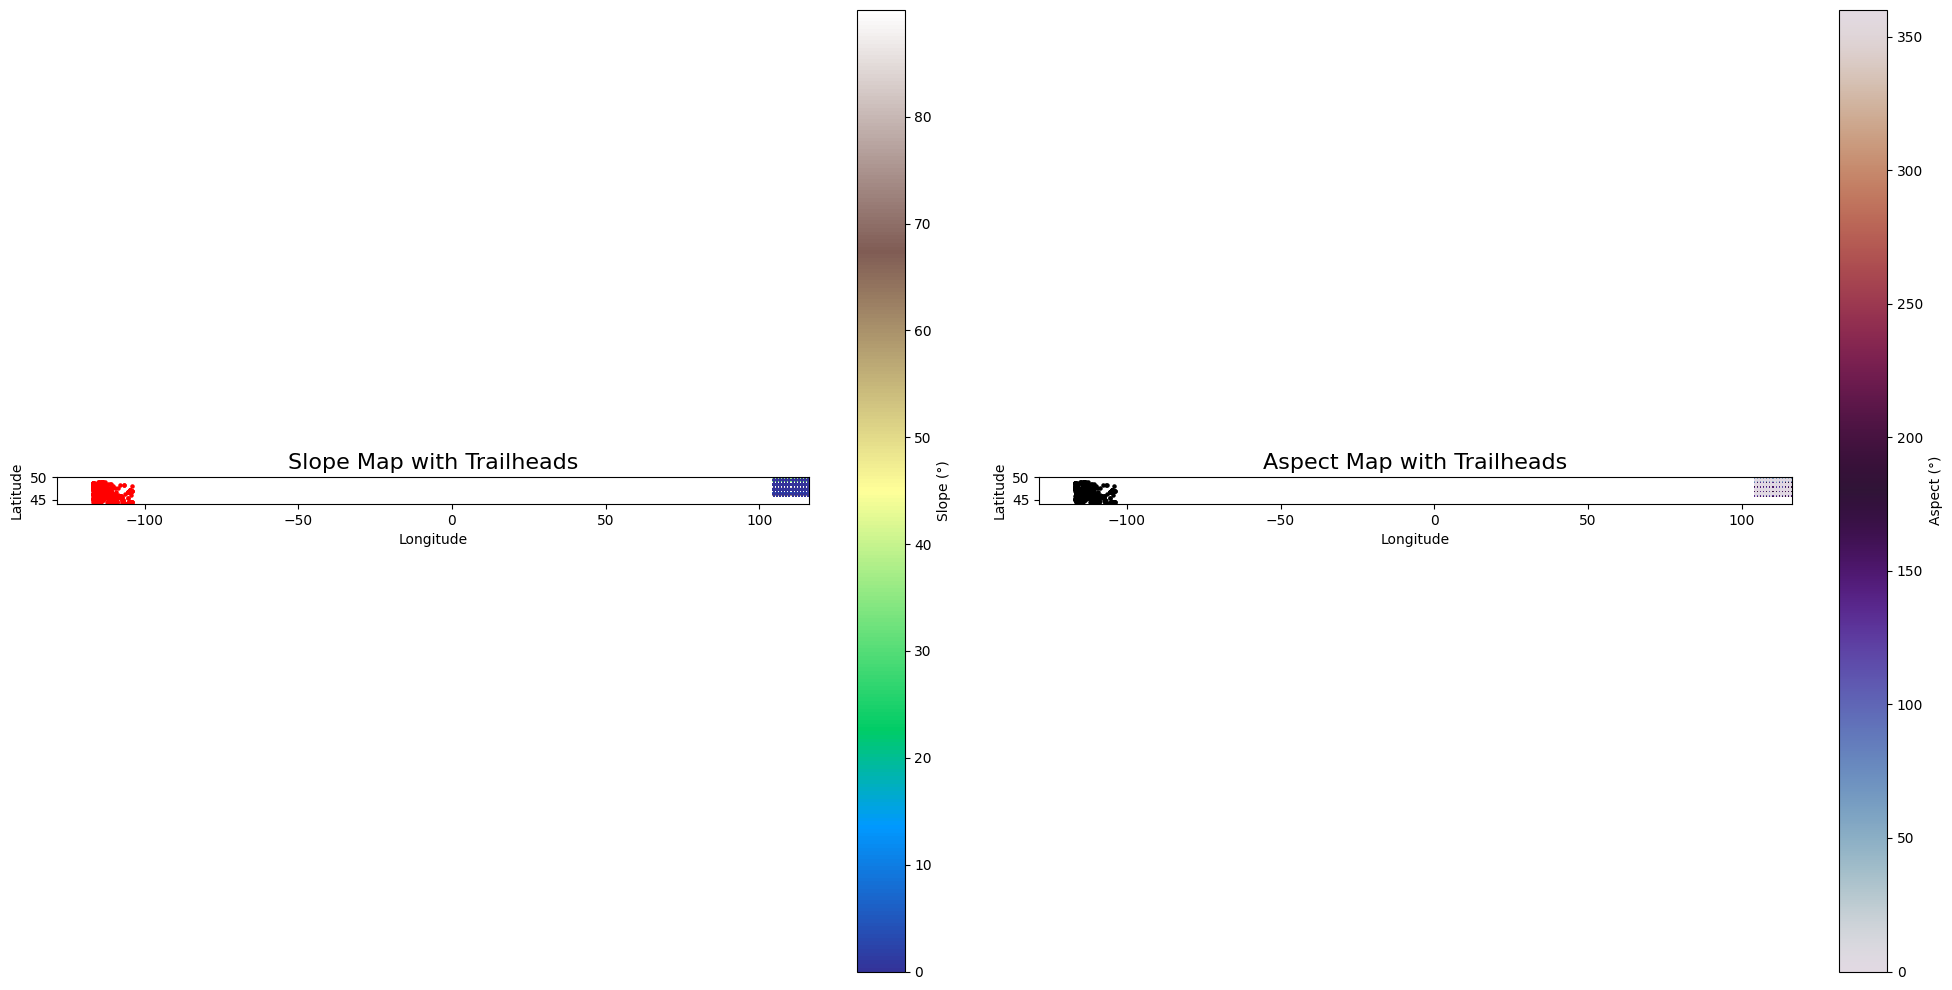

In [25]:
height, width = slope.shape
left, bottom, right, top = array_bounds(height, width, transform)
extent = [left, right, bottom, top]

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Slope map
slope_img = ax[0].imshow(slope, cmap='terrain', extent=extent)
trailheads.plot(ax=ax[0], color='red', markersize=5)
ax[0].set_title("Slope Map with Trailheads", fontsize=16)
ax[0].set_xlabel("Longitude")
ax[0].set_ylabel("Latitude")
plt.colorbar(slope_img, ax=ax[0], label="Slope (°)")

# Aspect map
aspect_img = ax[1].imshow(aspect, cmap='twilight', extent=extent)
trailheads.plot(ax=ax[1], color='black', markersize=5)
ax[1].set_title("Aspect Map with Trailheads", fontsize=16)
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")
plt.colorbar(aspect_img, ax=ax[1], label="Aspect (°)")

plt.tight_layout()
plt.savefig("slope_aspect_trailheads_map.png", dpi=300)
plt.show()


### 5. Results

From the graphs above we can see that the majority of the trailheads in montana are located within the latitude: 40 - 50 and longitude -150 - -100. The data had to be downsampled because of memory limitations on my machine.